In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

The aim of this exploration is to investigate how we may monitor market signals for sudden/steep market downturns. In specific, I am looking at how the Put-Call Ratio (PCR) and the SKEW Index from CBOE may serve to suggest increased market reactivity, which could indicate an imminent market crash with stimulation from other economic factors. 
<br>The data comprises of three different time periods pertaining to the S&P500 (SPX Index) with data sourced from Bloomberg Terminal, each containing the weekly data of ten years in the past three decades. 
<br>The rationale behind the segmentation of these time periods is the fact that economic trends/consumer habits have developed differently in each period as well as the fact that they each contain a distinct historic market "bubble" followed by a subsequent crash. 
<br>In particular, I am focusing on the dot-com bubble from the 1994-2004 data, the Great Financial Crisis from the 2004-2014 data, and COVID-19 from the 2014-2024 data. Lastly, in light of the recent "AI bubble", I hope to investigate whether there may be any applicabilities to the imminent market trends from studying the given data with a focus on the PCR and the SKEW. 

In [31]:
one = pd.read_csv("spx_1994_2004.csv")
two = pd.read_csv("spx2004-2014.csv")
three = pd.read_csv("spx2014_2024.csv")

In [32]:
one

,Date,SPX Index (L3),PCUSEQTR Index (R1),SKEW Index (R3),VIX Index (L2),FEDL01 Index (R2),H15T10Y Index (L1),OBV (SPX)
0,2004-07-15,1106.69,0.62,117.12,14.71,1.25,NaN,7.530902e+10
1,2004-07-09,1112.81,0.67,115.32,15.78,1.28,4.49,7.948999e+10
2,2004-07-02,1125.38,0.71,117.92,15.08,1.11,4.63,8.383000e+10
3,2004-06-25,1134.43,0.57,119.15,15.19,1.00,4.69,8.914381e+10
4,2004-06-18,1135.02,0.60,121.96,14.99,1.01,4.75,9.482037e+10
...,...,...,...,...,...,...,...,...
617,1992-09-18,422.93,NaN,117.20,13.74,3.28,6.39,NaN
618,1992-09-11,419.58,NaN,114.00,12.47,3.09,6.32,NaN
619,1992-09-04,417.08,NaN,110.70,12.98,3.33,6.53,NaN
620,1992-08-28,414.84,NaN,110.99,13.14,3.27,6.67,NaN


In [33]:
cols = ["Date", "SPX_Price", "PCR", "SKEW", "VIX", "FFR", "10Y_UST", "OBV"]
one.columns = cols
two.columns = cols
three.columns = cols

In [35]:
one["Date"] = pd.to_datetime(one["Date"])
one.set_index("Date" ,inplace = True)
two["Date"] = pd.to_datetime(two["Date"])
two.set_index("Date" ,inplace = True)
three["Date"] = pd.to_datetime(three["Date"])
three.set_index("Date" ,inplace = True)

In [34]:
df = pd.concat([one, two, three], ignore_index=True)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date" ,inplace = True)
df

,SPX_Price,PCR,SKEW,VIX,FFR,10Y_UST,OBV
Date,,,,,,,
2004-07-15,1106.69,0.62,117.12,14.71,1.25,NaN,7.530902e+10
2004-07-09,1112.81,0.67,115.32,15.78,1.28,4.49,7.948999e+10
2004-07-02,1125.38,0.71,117.92,15.08,1.11,4.63,8.383000e+10
2004-06-25,1134.43,0.57,119.15,15.19,1.00,4.69,8.914381e+10
2004-06-18,1135.02,0.60,121.96,14.99,1.01,4.75,9.482037e+10
...,...,...,...,...,...,...,...
2012-09-21,1460.15,0.62,130.60,13.98,0.16,1.81,NaN
2012-09-14,1465.77,0.53,117.26,14.51,0.15,1.76,NaN
2012-09-07,1437.92,0.54,120.70,14.38,0.14,1.63,NaN


In [36]:
df = df.sort_index()
df

,SPX_Price,PCR,SKEW,VIX,FFR,10Y_UST,OBV
Date,,,,,,,
1992-08-21,414.85,NaN,114.33,15.01,3.33,6.50,NaN
1992-08-28,414.84,NaN,110.99,13.14,3.27,6.67,NaN
1992-09-04,417.08,NaN,110.70,12.98,3.33,6.53,NaN
1992-09-11,419.58,NaN,114.00,12.47,3.09,6.32,NaN
1992-09-18,422.93,NaN,117.20,13.74,3.28,6.39,NaN
...,...,...,...,...,...,...,...
2024-06-21,5464.62,0.63,151.79,13.20,5.33,4.25,2.225300e+11
2024-06-28,5460.48,0.64,141.79,12.44,5.33,4.29,2.178700e+11
2024-07-05,5567.19,0.56,150.20,12.48,5.33,4.39,2.203000e+11


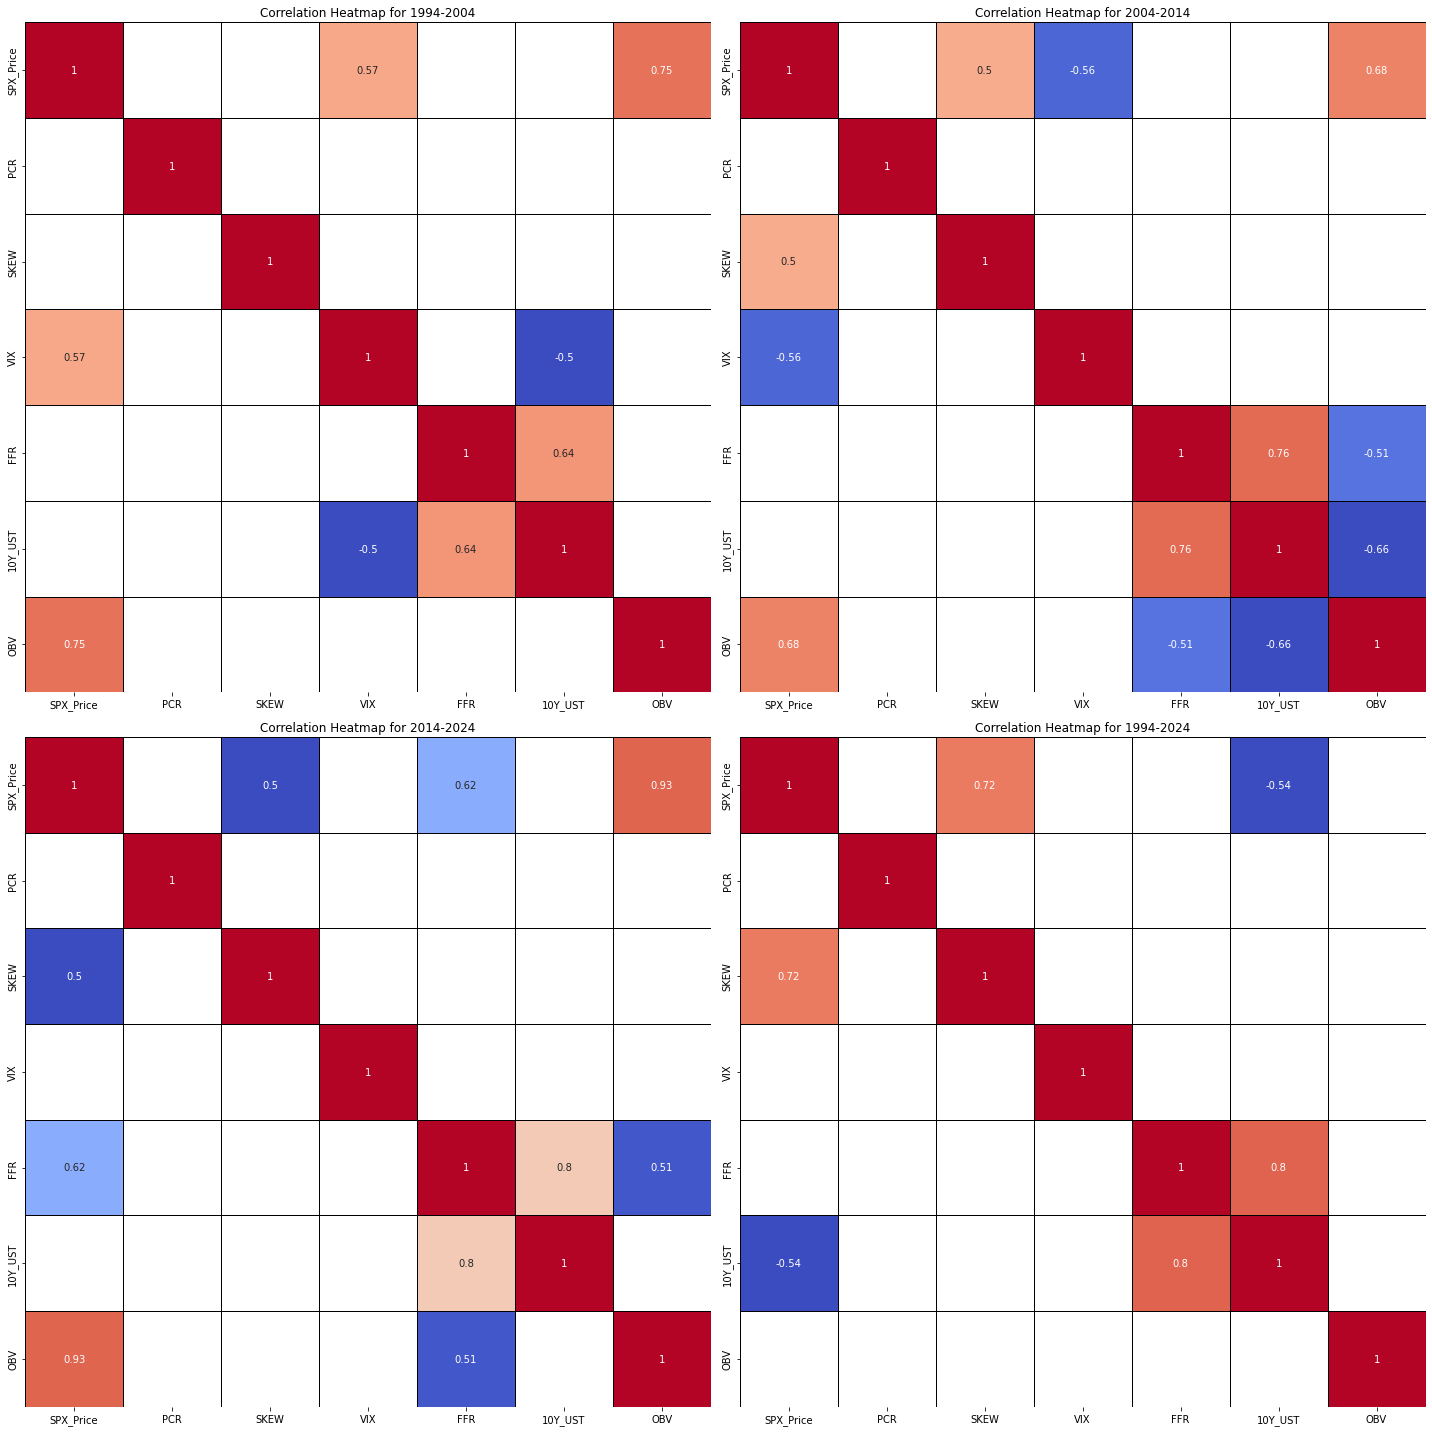

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


corr_one = one.corr()
corr_two = two.corr()
corr_three = three.corr()
corr_df = df.corr()

def create_highlight_mask(corr_matrix, threshold=0.5):
    mask = np.zeros_like(corr_matrix, dtype=bool)
    np.fill_diagonal(mask, False)
    mask[np.abs(corr_matrix) >= threshold] = True
    return mask

mask_one = create_highlight_mask(corr_one)
mask_two = create_highlight_mask(corr_two)
mask_three = create_highlight_mask(corr_three)
mask_df = create_highlight_mask(corr_df)

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

def plot_heatmap(corr_matrix, mask, ax, title):
    sns.heatmap(corr_matrix, annot=True, ax=ax, cmap="coolwarm", mask=~mask, linewidths=1, linecolor='black', cbar=False)
    ax.set_title(title)

plot_heatmap(corr_one, mask_one, axes[0, 0], 'Correlation Heatmap for 1994-2004')

plot_heatmap(corr_two, mask_two, axes[0, 1], 'Correlation Heatmap for 2004-2014')

plot_heatmap(corr_three, mask_three, axes[1, 0], 'Correlation Heatmap for 2014-2024')

plot_heatmap(corr_df, mask_df, axes[1, 1], 'Correlation Heatmap for 1994-2024')

plt.tight_layout()

plt.show()

SKEW & Price, other relations are self-explanatory/negligible. Especially, SKEWseems to be somewhat relevant in the recent periods but not so much prior to 2000s. 

In [42]:
#Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

datasets = {
    "1994-2004": one.drop(columns=["OBV", "10Y_UST"]).dropna(),
    "2004-2014": two.drop(columns=["OBV", "10Y_UST", "FFR"]).dropna(),
    "2014-2024": three.drop(columns=["FFR", "OBV"]).dropna(),
    "Combined": df.drop(columns=["OBV", "10Y_UST"]).dropna()
}

y = "SPX_Price"

results = {}
for period, data in datasets.items():
    X = data.drop(columns=[y])
    y_data = data[y]
    
    model = LinearRegression()
    model.fit(X, y_data)
    
    y_pred = model.predict(X)
    mse = mean_squared_error(y_data, y_pred)
    r2 = r2_score(y_data, y_pred)
    
    results[period] = {
        "Model": model,
        "MSE": mse,
        "R2": r2
    }
    
for period, result in results.items():
    print(f"Period: {period}")
    print(f"Mean Squared Error: {result['MSE']}")
    print(f"R-squared: {result['R2']}")
    print()


Period: 1994-2004
Mean Squared Error: 27112.99432336464
R-squared: 0.2820518222630064

Period: 2004-2014
Mean Squared Error: 37043.018386414085
R-squared: 0.433252861585272

Period: 2014-2024
Mean Squared Error: 516492.2479375338
R-squared: 0.5412494580973084

Period: Combined
Mean Squared Error: 575299.4679090212
R-squared: 0.5093276357768106



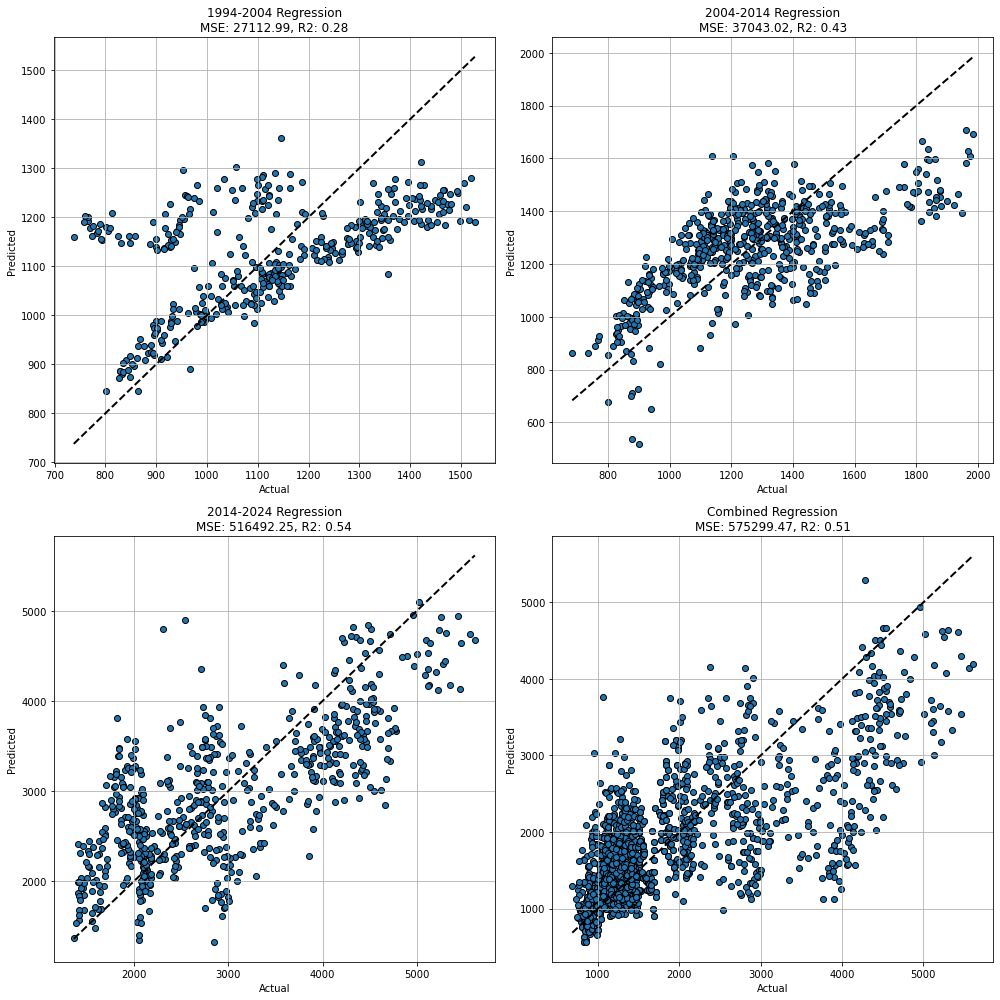

In [43]:
#illustrating the regression
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

def plot_regression(ax, y_actual, y_pred, title):
    ax.scatter(y_actual, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(title)
    ax.grid(True)

plot_regression(axs[0, 0], datasets["1994-2004"][y], results["1994-2004"]["Model"].predict(datasets["1994-2004"].drop(columns=[y])), 
                f"1994-2004 Regression\nMSE: {results['1994-2004']['MSE']:.2f}, R2: {results['1994-2004']['R2']:.2f}")
plot_regression(axs[0, 1], datasets["2004-2014"][y], results["2004-2014"]["Model"].predict(datasets["2004-2014"].drop(columns=[y])), 
                f"2004-2014 Regression\nMSE: {results['2004-2014']['MSE']:.2f}, R2: {results['2004-2014']['R2']:.2f}")
plot_regression(axs[1, 0], datasets["2014-2024"][y], results["2014-2024"]["Model"].predict(datasets["2014-2024"].drop(columns=[y])), 
                f"2014-2024 Regression\nMSE: {results['2014-2024']['MSE']:.2f}, R2: {results['2014-2024']['R2']:.2f}")
plot_regression(axs[1, 1], datasets["Combined"][y], results["Combined"]["Model"].predict(datasets["Combined"].drop(columns=[y])), 
                f"Combined Regression\nMSE: {results['Combined']['MSE']:.2f}, R2: {results['Combined']['R2']:.2f}")

plt.tight_layout()
plt.show()

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score

cross_val_results = {}
for period, data in datasets.items():
    X = data.drop(columns=[y])
    y_data = data[y]
    
    model = LinearRegression()
    mse_scores = -cross_val_score(model, X, y_data, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y_data, cv=5, scoring='r2')
    
    cross_val_results[period] = {
        "Mean MSE": mse_scores.mean(),
        "Std MSE": mse_scores.std(),
        "Mean R2": r2_scores.mean(),
        "Std R2": r2_scores.std()
    }

for period, result in cross_val_results.items():
    print(f"Period: {period}")
    print(f"Cross-Validation Mean MSE: {result['Mean MSE']}")
    print(f"Cross-Validation Std MSE: {result['Std MSE']}")
    print(f"Cross-Validation Mean R²: {result['Mean R2']}")
    print(f"Cross-Validation Std R²: {result['Std R2']}")
    print()

/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_44619/64606171.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(periods, rotation=45)
/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_44619/64606171.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(periods, rotation=45)


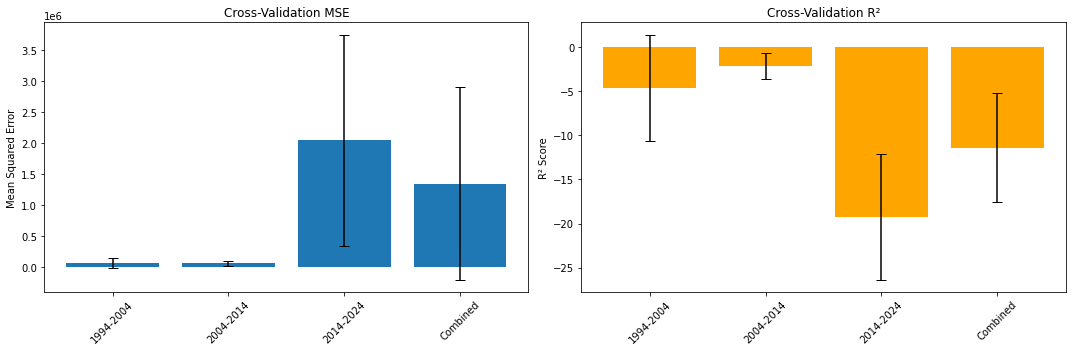

In [45]:
periods = list(cross_val_results.keys())
mean_mse = [cross_val_results[period]['Mean MSE'] for period in periods]
std_mse = [cross_val_results[period]['Std MSE'] for period in periods]
mean_r2 = [cross_val_results[period]['Mean R2'] for period in periods]
std_r2 = [cross_val_results[period]['Std R2'] for period in periods]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar(periods, mean_mse, yerr=std_mse, capsize=5)
ax[0].set_title('Cross-Validation MSE')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_xticklabels(periods, rotation=45)

ax[1].bar(periods, mean_r2, yerr=std_r2, capsize=5, color='orange')
ax[1].set_title('Cross-Validation R²')
ax[1].set_ylabel('R² Score')
ax[1].set_xticklabels(periods, rotation=45)

plt.tight_layout()
plt.show()


The above indicates that linear regression in this case is not effective in predicting the exact values of prices. 

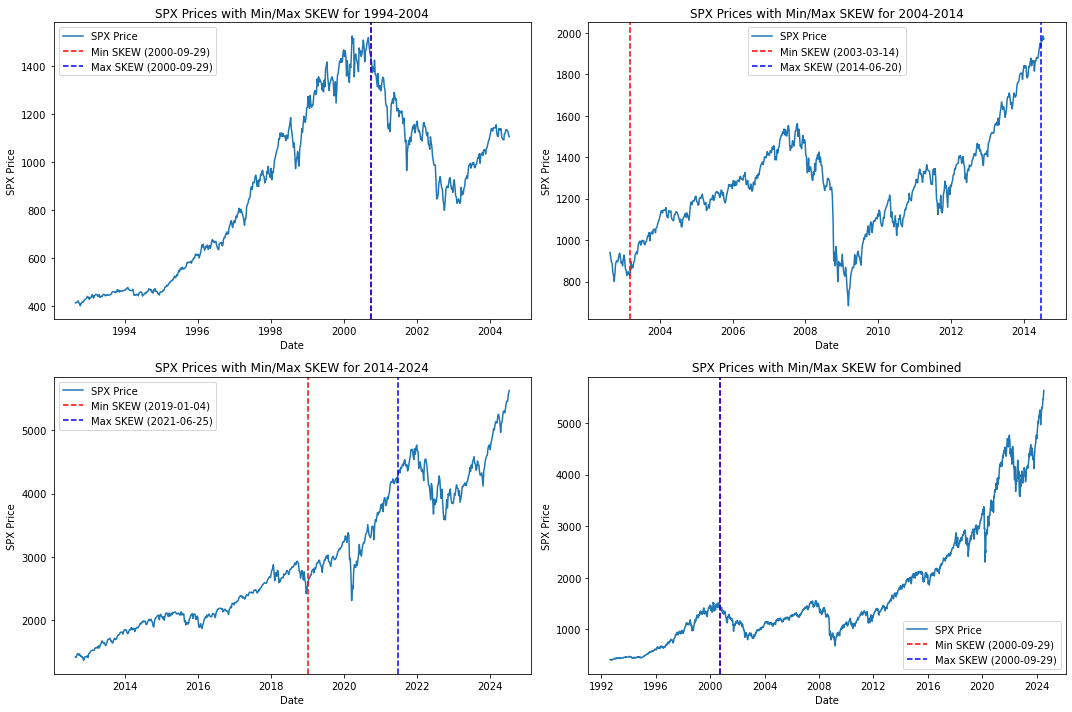

In [51]:
#Look at price trends relative to SKEW
def plot_with_vertical_lines(data, period, ax):
    spx_prices = data["SPX_Price"].to_numpy()
    skew_index = data["SKEW"].to_numpy()
    dates = data.index.to_numpy()

    min_skew_date = dates[skew_index.argmin()]
    max_skew_date = dates[skew_index.argmax()]

    ax.plot(dates, spx_prices, label="SPX Price")

    ax.axvline(x=min_skew_date, color='red', linestyle='--', label=f"Min SKEW ({pd.to_datetime(min_skew_date).date()})")
    ax.axvline(x=max_skew_date, color='blue', linestyle='--', label=f"Max SKEW ({pd.to_datetime(max_skew_date).date()})")

    ax.set_title(f"SPX Prices with Min/Max SKEW for {period}")
    ax.set_xlabel("Date")
    ax.set_ylabel("SPX Price")
    ax.legend()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
periods = ["1994-2004", "2004-2014", "2014-2024", "Combined"]
dataframes = [one, two, three, df]

for ax, period, data in zip(axes.flatten(), periods, dataframes):
    plot_with_vertical_lines(data, period, ax)

plt.tight_layout()
plt.show()

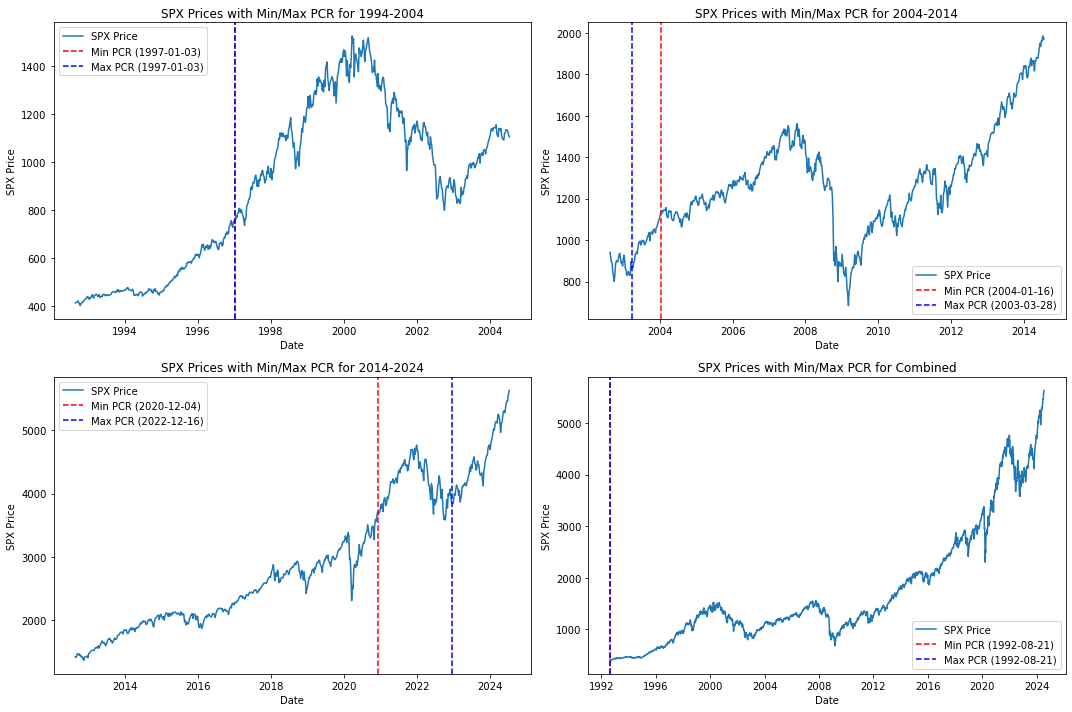

In [53]:
#PCR
def plot_with_vertical_lines(data, period, ax):
    spx_prices = data["SPX_Price"].to_numpy()
    pcr_index = data["PCR"].to_numpy()
    dates = data.index.to_numpy()

    min_pcr_date = dates[pcr_index.argmin()]
    max_pcr_date = dates[pcr_index.argmax()]

    ax.plot(dates, spx_prices, label="SPX Price")

    ax.axvline(x=min_pcr_date, color='red', linestyle='--', label=f"Min PCR ({pd.to_datetime(min_pcr_date).date()})")
    ax.axvline(x=max_pcr_date, color='blue', linestyle='--', label=f"Max PCR ({pd.to_datetime(max_pcr_date).date()})")

    ax.set_title(f"SPX Prices with Min/Max PCR for {period}")
    ax.set_xlabel("Date")
    ax.set_ylabel("SPX Price")
    ax.legend()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
periods = ["1994-2004", "2004-2014", "2014-2024", "Combined"]
dataframes = [one, two, three, df]

for ax, period, data in zip(axes.flatten(), periods, dataframes):
    plot_with_vertical_lines(data, period, ax)

plt.tight_layout()
plt.show()

In [81]:
#Is SKEW significantly different from PCR/SKEW 
diff = []
for i in range(len(one)-1):
    a = ((one["SPX_Price"].iloc[i+1] - one["SPX_Price"].iloc[i]) / one["SPX_Price"].iloc[i]) * 100
    diff.append(a)

onedf = one[1:]
onedf["Price_Change(%)"] = diff

diff2 = []
for i in range(len(two)-1):
    a = ((two["SPX_Price"].iloc[i+1] - two["SPX_Price"].iloc[i]) / two["SPX_Price"].iloc[i]) * 100
    diff2.append(a)


twodf = two[1:]
twodf["Price_Change(%)"] = diff2

diff3 = []
for i in range(len(three)-1):
    a = ((three["SPX_Price"].iloc[i+1] - three["SPX_Price"].iloc[i]) / three["SPX_Price"].iloc[i]) * 100
    diff3.append(a)

threedf = three[1:]
threedf["Price_Change(%)"] = diff3

/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_44619/2314235049.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onedf["Price_Change(%)"] = diff
/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_44619/2314235049.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twodf["Price_Change(%)"] = diff2
/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_44619/2314235049.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [82]:
onedf

,SPX_Price,PCR,SKEW,VIX,FFR,10Y_UST,OBV,Weekly_Change(%),Price_Change(%)
Date,,,,,,,,,
2004-07-09,1112.81,0.67,115.32,15.78,1.28,4.49,7.948999e+10,0.553000,0.553000
2004-07-02,1125.38,0.71,117.92,15.08,1.11,4.63,8.383000e+10,1.129573,1.129573
2004-06-25,1134.43,0.57,119.15,15.19,1.00,4.69,8.914381e+10,0.804173,0.804173
2004-06-18,1135.02,0.60,121.96,14.99,1.01,4.75,9.482037e+10,0.052008,0.052008
2004-06-11,1136.47,1.01,134.23,15.04,0.99,4.80,9.985778e+10,0.127751,0.127751
...,...,...,...,...,...,...,...,...,...
1992-09-18,422.93,NaN,117.20,13.74,3.28,6.39,NaN,2.070713,2.070713
1992-09-11,419.58,NaN,114.00,12.47,3.09,6.32,NaN,-0.792093,-0.792093
1992-09-04,417.08,NaN,110.70,12.98,3.33,6.53,NaN,-0.595834,-0.595834


In [59]:
twodf

,SPX_Price,PCR,SKEW,VIX,FFR,10Y_UST,OBV,Price_Change(%)
Date,,,,,,,,
2014-07-11,1967.57,0.54,138.74,12.08,0.09,2.57,2.680100e+11,-0.289366
2014-07-04,1985.44,0.49,142.28,10.32,0.10,2.60,2.701700e+11,0.908227
2014-06-27,1960.96,0.52,135.36,11.26,0.10,2.57,2.684000e+11,-1.232976
2014-06-20,1962.87,0.52,143.26,10.85,0.10,2.63,2.709500e+11,0.097401
2014-06-13,1936.16,0.56,127.78,12.18,0.09,2.62,2.679000e+11,-1.360763
...,...,...,...,...,...,...,...,...
2002-09-20,845.39,1.03,112.89,38.98,1.73,3.84,NaN,2.177986
2002-09-13,889.81,0.71,115.20,35.82,1.73,4.00,NaN,5.254380
2002-09-06,893.92,0.62,115.26,36.33,1.81,3.97,NaN,0.461896


In [60]:
threedf

,SPX_Price,PCR,SKEW,VIX,FFR,10Y_UST,OBV,Price_Change(%)
Date,,,,,,,,
2024-07-12,5615.35,0.57,150.86,12.46,5.33,4.25,2.237300e+11,-0.281822
2024-07-05,5567.19,0.56,150.20,12.48,5.33,4.39,2.203000e+11,-0.857649
2024-06-28,5460.48,0.64,141.79,12.44,5.33,4.29,2.178700e+11,-1.916766
2024-06-21,5464.62,0.63,151.79,13.20,5.33,4.25,2.225300e+11,0.075818
2024-06-14,5431.60,0.58,156.18,12.66,5.33,4.32,2.175700e+11,-0.604251
...,...,...,...,...,...,...,...,...
2012-09-21,1460.15,0.62,130.60,13.98,0.16,1.81,NaN,1.352149
2012-09-14,1465.77,0.53,117.26,14.51,0.15,1.76,NaN,0.384892
2012-09-07,1437.92,0.54,120.70,14.38,0.14,1.63,NaN,-1.900025


In [61]:
diff4 = []
for i in range(len(df)-1):
    a = ((df["SPX_Price"].iloc[i+1] - df["SPX_Price"].iloc[i]) / df["SPX_Price"].iloc[i]) * 100
    diff4.append(a)

dfdf = df[1:]
dfdf["Price_Change(%)"] = diff4
dfdf

/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_44619/1578942497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdf["Price_Change(%)"] = diff4


,SPX_Price,PCR,SKEW,VIX,FFR,10Y_UST,OBV,Price_Change(%)
Date,,,,,,,,
1992-08-28,414.84,NaN,110.99,13.14,3.27,6.67,NaN,-0.002411
1992-09-04,417.08,NaN,110.70,12.98,3.33,6.53,NaN,0.539967
1992-09-11,419.58,NaN,114.00,12.47,3.09,6.32,NaN,0.599405
1992-09-18,422.93,NaN,117.20,13.74,3.28,6.39,NaN,0.798417
1992-09-25,414.35,NaN,114.25,14.80,3.07,6.47,NaN,-2.028705
...,...,...,...,...,...,...,...,...
2024-06-21,5464.62,0.63,151.79,13.20,5.33,4.25,2.225300e+11,0.607924
2024-06-28,5460.48,0.64,141.79,12.44,5.33,4.29,2.178700e+11,-0.075760
2024-07-05,5567.19,0.56,150.20,12.48,5.33,4.39,2.203000e+11,1.954224


In [83]:
onedf = onedf.sort_index()
twodf = twodf.sort_index()
threedf = threedf.sort_index()
dfdf = dfdf.sort_index()

In [84]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

def calculate_stats(df, overall_column, downturn_df, column_name):
    overall_stats = df[overall_column].describe()
    downturn_stats = downturn_df[column_name].describe()

    t_test_result = ttest_ind(df[overall_column].dropna(), downturn_df[column_name].dropna(), equal_var=False)
    return overall_stats, downturn_stats, t_test_result

def analyze_data(df, period_name):
    df['Weekly_Change(%)'] = df['SPX_Price'].pct_change(periods=1) * 100
    percentile_5 = df['Weekly_Change(%)'].quantile(0.05)
    significant_downturns = df[df['Weekly_Change(%)'] < percentile_5]
    downturn_periods = pd.concat([df.loc[date - pd.DateOffset(weeks=4):date] for date in significant_downturns.index])
    
    if downturn_periods.empty:
        print(f"No significant downturns detected for {period_name}.")
        return None
    
    overall_pcr_stats, downturn_pcr_stats, pcr_t_test = calculate_stats(df, 'PCR', downturn_periods, 'PCR')
    overall_skew_stats, downturn_skew_stats, skew_t_test = calculate_stats(df, 'SKEW', downturn_periods, 'SKEW')
    
    return {
        "Period": period_name,
        "Overall_PCR": overall_pcr_stats,
        "Downturn_PCR": downturn_pcr_stats,
        "PCR_T-Test": pcr_t_test,
        "Overall_SKEW": overall_skew_stats,
        "Downturn_SKEW": downturn_skew_stats,
        "SKEW_T-Test": skew_t_test
    }

results = []
results.append(analyze_data(onedf, "1994-2004"))
results.append(analyze_data(twodf, "2004-2014"))
results.append(analyze_data(threedf, "2014-2024"))
results.append(analyze_data(dfdf, "Combined"))

results = [r for r in results if r is not None]

def format_results(results):
    formatted_results = []
    for result in results:
        formatted_results.append({
            "Period": result["Period"],
            "Overall_PCR_Mean": result["Overall_PCR"]["mean"],
            "Downturn_PCR_Mean": result["Downturn_PCR"]["mean"],
            "PCR_T-Test_Statistic": result["PCR_T-Test"].statistic,
            "PCR_T-Test_P-Value": result["PCR_T-Test"].pvalue,
            "Overall_SKEW_Mean": result["Overall_SKEW"]["mean"],
            "Downturn_SKEW_Mean": result["Downturn_SKEW"]["mean"],
            "SKEW_T-Test_Statistic": result["SKEW_T-Test"].statistic,
            "SKEW_T-Test_P-Value": result["SKEW_T-Test"].pvalue
        })
    return pd.DataFrame(formatted_results)

formatted_results = format_results(results)
formatted_results


,Period,Overall_PCR_Mean,Downturn_PCR_Mean,PCR_T-Test_Statistic,PCR_T-Test_P-Value,Overall_SKEW_Mean,Downturn_SKEW_Mean,SKEW_T-Test_Statistic,SKEW_T-Test_P-Value
0,1994-2004,0.557423,0.621724,-3.369258,8.869118e-04,115.450597,115.576839,-0.290761,7.714947e-01
1,2004-2014,0.651820,0.723742,-6.019823,6.869517e-09,119.815862,118.115742,3.646503,3.144362e-04
2,2014-2024,0.638357,0.702258,-4.785961,3.254529e-06,131.063446,127.322194,4.370652,1.772669e-05
3,Combined,0.623965,0.685893,-7.216776,1.394015e-12,122.136550,119.652134,5.917306,4.515534e-09


Total return by holding SPX: 12.57
Total return by strategy: 7.79


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

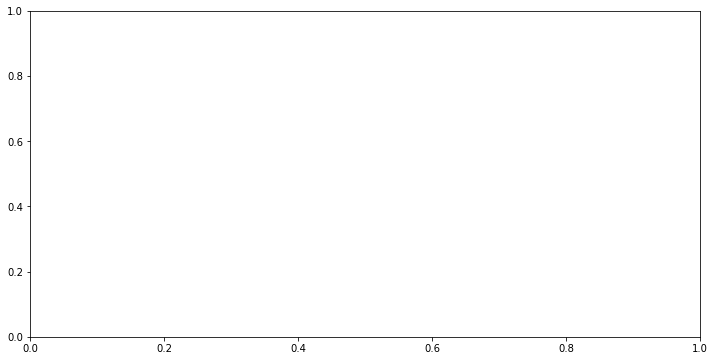

In [94]:
def calculate_ema(df, column, span=10):
    return df[column].ewm(span=span, adjust=False).mean()

def calculate_thresholds(df, column, ema_span=10, std_multiplier=2):
    df[f'{column}_EMA'] = calculate_ema(df, column, span=ema_span)
    df[f'{column}_Deviation'] = df[column] - df[f'{column}_EMA']
    std_dev = df[f'{column}_Deviation'].std()
    upper_threshold = df[f'{column}_EMA'] + std_multiplier * std_dev
    lower_threshold = df[f'{column}_EMA'] - std_multiplier * std_dev
    return upper_threshold, lower_threshold

pcr_upper, pcr_lower = calculate_thresholds(dfdf, 'PCR')
skew_upper, skew_lower = calculate_thresholds(dfdf, 'SKEW')

dfdf['PCR_Upper_Threshold'] = pcr_upper
dfdf['PCR_Lower_Threshold'] = pcr_lower
dfdf['SKEW_Upper_Threshold'] = skew_upper
dfdf['SKEW_Lower_Threshold'] = skew_lower

dfdf['PCR_Warning'] = (dfdf['PCR'] > dfdf['PCR_Upper_Threshold']) | (dfdf['PCR'] < dfdf['PCR_Lower_Threshold'])
dfdf['SKEW_Warning'] = (dfdf['SKEW'] > dfdf['SKEW_Upper_Threshold']) | (dfdf['SKEW'] < dfdf['SKEW_Lower_Threshold'])

def trading_strategy(df):
    df['Position'] = 0
    holding = False
    
    for i in range(len(df)):
        if not holding:
            # Buy signal
            if not df['PCR_Warning'].iloc[i] and not df['SKEW_Warning'].iloc[i]:
                df.at[df.index[i], 'Position'] = 1
                holding = True
        else:
            # Sell signal
            recent_ffr_changes = df['FFR'].iloc[max(0, i-4):i].diff().dropna()
            if df['PCR_Warning'].iloc[i] or df['SKEW_Warning'].iloc[i]:
                if any(recent_ffr_changes > 0):
                    df.at[df.index[i], 'Position'] = 0
                    holding = False
                else:
                    df.at[df.index[i], 'Position'] = 1
            else:
                df.at[df.index[i], 'Position'] = 1
    
    return df

dfdf = trading_strategy(dfdf)

def calculate_returns(df):
    df['Returns'] = df['SPX_Price'].pct_change()
    df['Strategy_Returns'] = df['Returns'] * df['Position'].shift(1)
    return df

dfdf = calculate_returns(dfdf)

total_return_holding = (1 + dfdf['Returns']).cumprod() - 1
total_return_strategy = (1 + dfdf['Strategy_Returns']).cumprod() - 1

print(f"Total return by holding SPX: {total_return_holding.iloc[-1]:.2f}")
print(f"Total return by strategy: {total_return_strategy.iloc[-1]:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(dfdf.index, (1 + dfdf['Returns']).cumprod(), label='Holding SPX')
plt.plot(dfdf.index, (1 + dfdf['Strategy_Returns']).cumprod(), label='Strategy')
plt.title('Comparison of Returns: Holding SPX vs. Strategy')
plt.legend()
plt.show()
